### Question 2:

Accuracy: an example would be face id systems because you would want to correctly identify true positives to allow access, and also true negatives to deny access.

Sensitivity: an example would be earthquake warning systems because they have to detect as many actual earthquakes as possible so false negatives are included. It is better to flag a few false positives than to miss a false negative.

Specificity: an example would be a spam filter for online emails. A high specificity means the filter correctly identifies most legitimate emails as not spam. While some spam might slip through (false negatives), minimizing the chance of marking a real email as spam is essential.

Precision: an example would be a credit card fraud detection system. It's better to have a system that might miss a few scam transactions (false negatives) than one that frequently flags real transactions as fraud (false positives) because it could cause inconvenience and frustration for the majority of the customers rather than just one or two.

### Question 4:


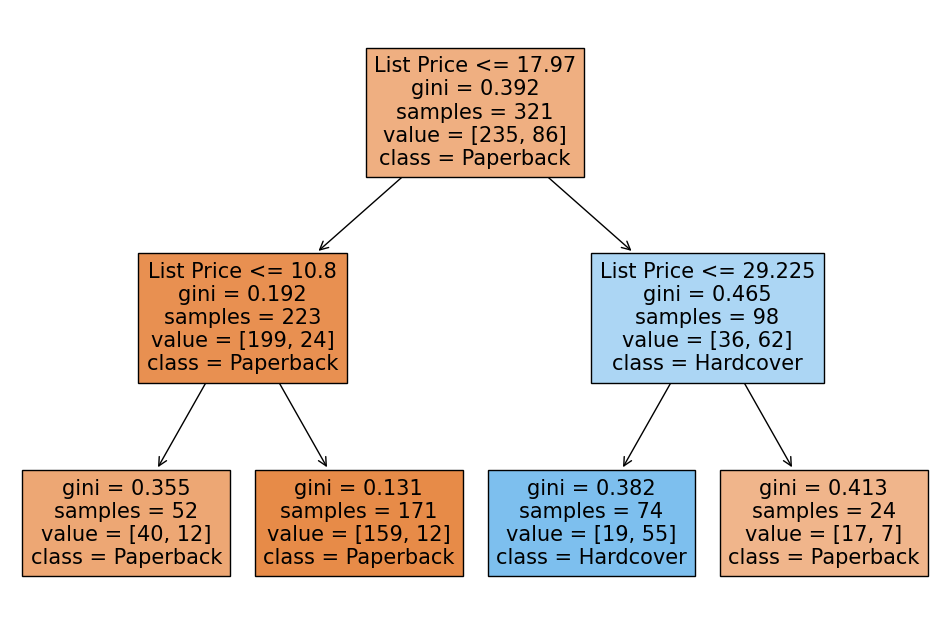

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
ab_reduced = ab[['NumPages', 'Thick', 'List Price', 'Hard_or_Paper']].copy()
ab_reduced_noNaN = ab_reduced.dropna()
# Extract features (X) and target (y) from the training data
X_train = ab_reduced_noNaN[['List Price']]
y_train = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=random_seed)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


Predictions:

Root Node:

If List Price <= threshold1 -> Go Left (Lower price range)
If List Price > threshold1 -> Go Right (Higher price range)

Left Branch:

If List Price <= threshold2 -> Predict Paperback (high confidence)
If List Price > threshold2 -> Mixed prediction (less confidence)

Right Branch:

If List Price <= threshold3 -> Mixed prediction (less confidence)
If List Price > threshold3 -> Predict Hardcover (high confidence)

### Question 6:

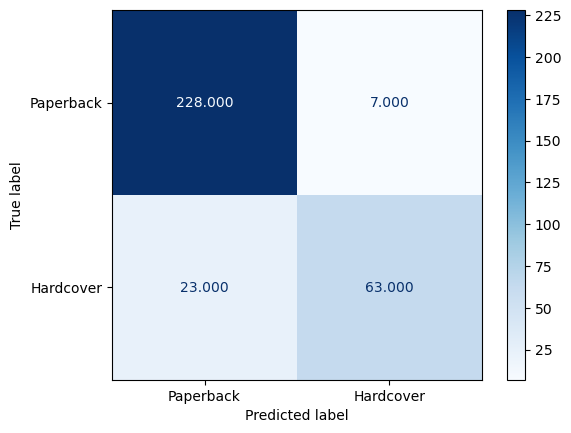

Metrics for clf2:
Accuracy: 0.907
Sensitivity: 0.733
Specificity: 0.97


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Train clf2
X_train2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y_train2 = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train2, y_train2)

# Predict using clf2
X_test2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y_pred_clf2 = clf2.predict(X_test2)

# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap='Blues', values_format='.3f')
plt.show()

# Metrics for clf2
TP_clf2, FN_clf2, FP_clf2, TN_clf2 = cm_clf2[1, 1], cm_clf2[1, 0], cm_clf2[0, 1], cm_clf2[0, 0]
accuracy_clf2 = (TP_clf2 + TN_clf2) / np.sum(cm_clf2)
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)

print(f"Metrics for clf2:")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")
print(f"Sensitivity: {np.round(sensitivity_clf2, 3)}")
print(f"Specificity: {np.round(specificity_clf2, 3)}")

### Question 7:

The 2 confusion matrices are different because the first one only uses 'List Price' variable to make predictions, while the second one also has 'NumPages' and 'Thick'.
The confusion matrices for clf and clf2 on the test data are better because they evaluate the models on unseen data. This provides a more accurate assessment of how well the models generalize to new data.

### NotebookLM summary (for Q2): 
This conversation focused on understanding Classification Decision Trees and how their prediction methods differ from Multiple Linear Regression. It also explored various classification metrics and their real-world applications, particularly focusing on specificity in the context of food safety testing.
The chat began by establishing that Classification Decision Trees are used for predicting categorical outcomes, while Multiple Linear Regression predicts continuous outcomes. [Your first response]
The conversation then shifted to exploring the mechanics of a Classification Decision Tree. It was highlighted that these trees make predictions through a sequence of decisions, starting at a root node and branching down through various nodes based on predictor variables until reaching a leaf node that represents the final prediction. [Your first response]
It was also noted that the sequential decisions in a tree resemble interactions between predictor variables in Multiple Linear Regression. [Your first response]
The conversation then focused on various classification metrics:
Accuracy was described as a good overall metric when false positives and false negatives have similar consequences. [Your second response]
Sensitivity was highlighted as crucial when minimizing false negatives is critical. [Your second response]
Specificity was explained as important when minimizing false positives is key. [Your second response]
Precision was noted as valuable when ensuring the accuracy of positive predictions is paramount. [Your second response]
Finally, the conversation explored the application of specificity to food safety testing. It was emphasized that high specificity is crucial in this context to minimize false positives, which could lead to unnecessary product recalls and wasted resources. [Your third response]

### ChatGPT summary (for rest of the questions):
In this chat, we discussed how to build and evaluate classification models using a decision tree to predict whether a book is hardcover or paperback. The process included:

Data Preprocessing: You started by loading and cleaning the dataset, ensuring that columns like NumPages, Thick, List Price, and Hard_or_Paper were retained after removing NaN values.

Model Training:

The first model (clf) used only List Price to predict book type, with a decision tree trained to a depth of 2.
The second model (clf2) included additional features (NumPages, Thick, and List Price) and was trained to a depth of 4.
Evaluation: We discussed how to evaluate model performance using confusion matrices, accuracy, sensitivity, and specificity, and the importance of using test data to avoid overfitting.

Issues and Fixes: Several errors, such as mismatches in data splits and missing variables, were addressed by ensuring proper alignment of training and test data.

Visualization: You visualized decision trees using tree.plot_tree() and graphviz, which helped explain how predictions are made based on feature values.

Finally, we compared confusion matrices for models with different feature sets, noting that including more features can lead to improved model performance.

https://chatgpt.com/share/673ff0fc-4484-8012-a9eb-e8b150570c0f